In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import sympy as sp
import math

# 6.1) Estimation of the Mean in WSS processes
One of the properties of WSS processes is that they have a mean function which is constant,
i.e. it does not depend on the time index. This suggests the idea that, if only one realization
of a WSS process is available, one may attempt to estimate the mean of the process by averaging
the different temporal samples of the process. For instance, consider the WSS process:

$$
X[n] = U[n] - \frac{1}{2} U[n-1], \; \; n=1,2,\dots
$$

with $U(n) \overset{i.i.d.}{\sim} N(3, 9)$.

## a) Verify that the process is WSS by computing its mean and ACF.

To compute the mean, we can do the following:

$$
\begin{align}
E[X[n]] &= \\
&= E[U[n] - \frac{1}{2} U[n-1]] \\
&= E[U[n]] - E[\frac{1}{2} U[n-1]] \\
&= 3 - \frac{1}{2} \cdot 3 \\
&= \frac{3}{2} = 1.5
\end{align}
$$

The variance is not really needed, but I calculated it and refuse to delete it...

$$
\begin{align}
Var(X[n]) &= \\
&= Var(U[n] - \frac{1}{2} U[n-1]) \\
&= Var(U[n]) + Var(-\frac{1}{2} U[n-1]) \\
&= Var(U[n]) + (- \frac{1}{2})^2 Var(U[n-1]) \\
&= 9 + \frac{1}{4} 9 \\
&= \frac{36}{4} + \frac{9}{4} \\
&= \frac{45}{4} \\
\end{align}
$$

ACF for $U[n]$, as this will make our life easier below!

$$
\begin{align}
R_{UU}(n, n+k) &= \\
&= E[U[n]U[n+k]] \\
&= E[U[n]U[n]] \\
&= E[U[n]^2] \\
&= Var(U[n)) + E[X]^2 
= 9 + 9 = 18
\end{align}
$$

$$
\begin{align}
R_{UU}(n, n+k) &= \\
&= E[U[n]U[n+k]] \\
&= E[U[n]]E[U[n+k]] \\
&= E[U[n]]E[U[n+k]]
= 3 \cdot 3 = 9 \\
\end{align}
$$

$$
\begin{align}
R_{U}(k) &= E[U[n]U[n+k]] = 9 + 9\delta[k] \\
R_{U}(k) &= E[U[n-1]U[n-1+k]] = 9 + 9\delta[k] \\
\end{align}
$$

For the ACF, we do the following:

$$
\begin{align}
R_{XX}(n, n+k) &= \\
&= E[X[n]X[n+k]] \\
&= E[(U[n] - \frac{1}{2} U[n-1])(U[n+k] - \frac{1}{2} U[n+k-1])] \\
&= E[ U[n]U[n+k] - \frac{1}{2}U[n]U[n+k-1] - \frac{1}{2}U[n-1]U[n+k] + \frac{1}{4}U[n-1]U[n+k-1]] \\
&= E[U[n]U[n+k]] - E[\frac{1}{2}U[n]U[n+k-1]] - E[\frac{1}{2}U[n-1]U[n+k]] + E[\frac{1}{4}U[n-1]U[n+k-1]] \\
&= R_U(k) - \frac{1}{2}R_U(k-1) - \frac{1}{2}R_U(k+1) + \frac{1}{4}R_U(k) \\
&= 9 + 9\delta[k] - \frac{1}{2}(9 + 9\delta[k-1]) - \frac{1}{2}(9 + 9\delta[k+1]) + \frac{1}{4}(9 + 9\delta[k]) \\
&= 9 + 9\delta[k] - \frac{9}{2} - \frac{9}{2}\delta[k-1] - \frac{9}{2} - \frac{9}{2}\delta[k+1] + \frac{9}{4} + \frac{9}{4}\delta[k] \\
&= 9 - \frac{9}{2} - \frac{9}{2} + \frac{9}{4}  + 9\delta[k] - \frac{9}{2}\delta[k-1] - \frac{9}{2}\delta[k+1] + \frac{9}{4}\delta[k] \\
&= 9 - \frac{9}{2} - \frac{9}{2} + \frac{9}{4}  + \frac{45}{9}\delta[k] - \frac{9}{2}\delta[k-1] - \frac{9}{2}\delta[k+1] \\
&= \frac{9}{4} + \frac{45}{4}\delta[k] - \frac{9}{2}\delta[k-1] - \frac{9}{2}\delta[k+1] \\
\end{align}
$$

In [2]:
fnd = lambda k: 1 if k == 0 else 0

exp = lambda k: (9/4)+(45/4)*fnd(k)-(9/2)*fnd(k-1)-(9/2)*fnd(k+1)

display(exp(-1))
display(exp(0))
display(exp(1))

-2.25

13.5

-2.25

## b)
Generate a realization of the process in (1) with a large number of samples N

In [3]:
N = 10000000

meanU = 3
varU = 9
U = np.random.normal(meanU, math.sqrt(varU), N)
UShifted = np.roll(U,-1)
X = U - (1/2)*UShifted

display(np.var(X))

11.244767695694437

## c)
Next, use N consecutive samples of the process to estimate its mean, with $N = 1, 2, \dots , M$.
Plot the estimates of the mean as a function of the number of samples used.
Plot, on top of that, the true mean value for comparison.

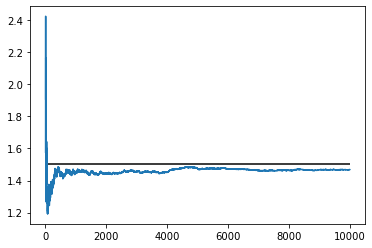

In [4]:
N = 10000

meanValues = np.empty(N)
for n in range(1, N):
    meanValues[n] = np.mean(X[:n])
x = np.arange(0, N)

fig, ax = plt.subplots()
ax.plot(x[5:], meanValues[5:])
ax.hlines(1.5, xmin=0, xmax=N)

## e) NEED TO DO
How does the estimation error behave as a function of the number of used samples?
How many samples do you need to use to get reasonably accurate results?

## NEW INFORMATION
Next consider a second random process, defined as

$$
Y(n) = A + W(n), \; \; n = 1, 2, \dots
$$

with $W(n) \overset{i.i.d}{\sim}.N(0, 1)$, and A being a random variable distributed as $A \sim U(0, 3)$.

## e)
Compute the mean function and ACF of Y (n). Is it also WSS?

First lets compute the mean (we use the linearity to split them up):

$$
E[Y[n]] 
= E[A + W[n]]
= E[A] + E[W[n]]
= \frac{1}{2}(0+3) + 0
= \frac{3}{2}
$$

Now lets calculate the ACF of $Y(n)$, but first lets find the ACF for our $W(n)$.

$$
\begin{align}
E[W(n)W(n+k)] &=
\left\{ \begin{matrix}
E[W(n)W(n)] = E[W(n)^2]  = Var(W(n))+ E[W(n)]^2 = 1 & \; \text{for $k=0$} \\
E[W(n)]E[W(n+k)] = 0 \cdot E[W(n+k)]  = 0 & \; \text{for $k \neq 0$} \\
\end{matrix} \right. \\
R_W(k) &= \delta(k)
\end{align}
$$

Now the ACF of $Y(n)$, keep in mind our uniform distribution A is constant, as the PDF is constant (as far as I know at least).

$$
\begin{align}
E[Y(n)Y(n+k)] &= \\
&= E[(A+W(n))(A+W(n+k))] \\
&= E[A^2+AW(n+k)+AW(n)+W(n)W(n+k)] \\
&= E[A^2] + E[AW(n+k)] + E[AW(n)] + E[W(n)W(n+k)] \\
&= E[A^2] + E[A]E[W(n+k)] + E[A]E[W(n)] + R_W(k) \\
&= E[A^2] + E[A] \cdot 0 + E[A] \cdot 0 + R_W(k) \\
&= E[A^2] + R_W(k) \\
&= Var(A) + E[A]^2 + R_W(k) \\
&= \frac{1}{12}(3-0) + \left(\frac{1}{2}(0+3)\right)^2 + R_W(k) \\
&= \frac{3}{12} + \left(\frac{3}{2}\right)^2 + \partial(k) \\
\end{align}
$$

We can then see if it follows the norms for a ACF, by having a costant mean, and highest value in 0 (and positive), being symmetric around the x axes.

$$
R_Y(k) = \left\{ \begin{matrix}
3.5 & \text{for $k=0$} \\
2.5 & \text{for $|k|=1$} \\
\end{matrix}\right.
$$

In [5]:
fnd = lambda k: 1 if k == 0 else 0

exp = lambda k: (3/12)+(3/2)**2 + fnd(k)

display(exp(-1))
display(exp(0))
display(exp(1))

2.5

3.5

2.5

1.501047770290116

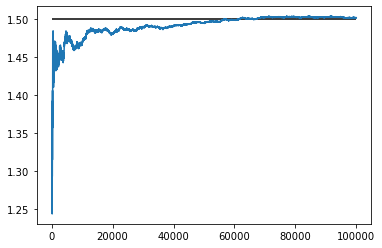

In [6]:
N = 1000000

# normal distribution for W(n)
meanW = 0
varW = 1

# uniform distribution for A(n)
aA = 0
aB = 3

W = np.random.normal(meanW, math.sqrt(varW), N)
A = np.random.uniform(aA, aB, N)

Y = A + W

# calculate the mean + show the true mean
N = 100000
meanValues = np.empty(N)
for n in range(1, N):
    meanValues[n] = np.mean(X[:n])
x = np.arange(0, N)

fig, ax = plt.subplots()
ax.plot(x[100:], meanValues[100:]) # cut off the first X samples, to show the effect better
ax.hlines(1.5, xmin=0, xmax=N)

display(Y.mean())

# g)
Now, generate multiple realizations of Y (n) and estimate its mean function by
averaging over the different realizations, and not over the time index.
Do the results make more sense now?

From what is shows below, yes it does make a lot of more sense!

*NOTE!! The explanation for this is found in the group work assignment*

Summarised, our $X(n)$ is a ergodic in the mean, while our $Y(n)$ is not and therefore we have to generate multiple realisations of the process to get the estimation.

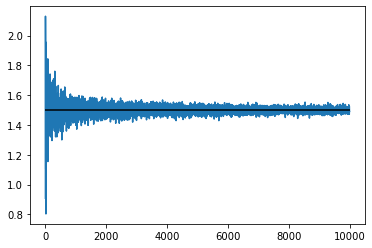

In [7]:
N = 10000
meanValues = np.empty(N)

for n in range(1, N):
    W = np.random.normal(meanW, math.sqrt(varW), n)
    A = np.random.uniform(aA, aB, n)
    Y = A + W
    meanValues[n] = Y.mean()
    
    
fig, ax = plt.subplots()
ax.hlines(1.5, xmin=0, xmax=N, zorder=1)
ax.plot(meanValues[10:], zorder=0)

# 6.2) Checking Wide-Sense Stationarity

## a)
Write a program to generate and plot multiple realizations of each of the processes:

- 1) Moving average process
$$
X(n) = U(n) - \frac{1}{2}U(n-1) + \frac{1}{4} U(n-2), \; \; U(n) \overset{iid}{\sim} N(0,1), \; \; n \in \mathbb{Z}
$$

- 2) Randomly phased cosine
$$
Y(t) = cos(t + \theta), \; \; \theta \sim U(-\pi, \pi), \; \; t \in \mathbb{R}
$$

- 3) Random walk
$$
Z(n) = \sum_{i=1}^n B(i), \; \; n = 1, 2, \dots
$$

with iid samples $B(i)$, $i = 1, 2, \dots$ drawn according to the pmf

$$
B(i) \overset{iid}{\sim} p_B(b) = \left\{ \begin{matrix}
\frac{1}{2} & b = +1 \\
\frac{1}{2} & b = -1 \\
\end{matrix} \right.
$$

## b)
Use the realizations generated in your program to estimate the mean and variance functions of the above three processes.
Based on the estimates obtained, what can you say about the stationarity / non-stationarity of the processes?


Because the mean and the variance does not change with the number of samples, then we can see that it is stationary.

In [8]:
N = 10000000

# X(n)
meanU = 0
varU = 1
U = np.random.normal(meanU, math.sqrt(varU), N)
UShift1 = np.roll(U, -1)
UShift2 = np.roll(U, -2)
X = U - (1/2)*UShift1 + (1/4)*UShift2

# Y(t)
aA = -math.pi
bA = -1 * aA
Theta = np.random.uniform(aA, bA, N)
Y = np.cos(np.arange(N) + Theta)

# Z(n)
B = np.random.binomial(1, 0.5, N)
B = np.where(B == 0, -1, B) # turn it into our +1 and -1 with equal probability
#Z = np.array([np.sum(B[:n]) for n in range(N)])
Z = B

display("X(n) - Mean {} - Var {}".format(X.mean(), X.var()))
display("Y(t) - Mean {} - Var {}".format(Y.mean(), Y.var()))
display("Z(n) - Mean {} - Var {}".format(Z.mean(), Z.var()))

'X(n) - Mean -7.660518780052418e-05 - Var 1.311489496213059'

'Y(t) - Mean 0.00015954865054158048 - Var 0.5000281869523165'

'Z(n) - Mean 0.0001654 - Var 0.9999999726428399'

## c)
Next, derive the necessary results to check whether each of the processes is or is not WSS.
Compare your calculations with the estimates obtained from your program.

For our $X(n)$, it is a linear combination of U which is normal and IID.
Because of this linear combination, and we know that U is WSS and SSS, therefore $X(n)$ is also WSS and SSS.

For our $Y(t)$, we can calucale the mean and the ACF.

$$
\begin{align}
E[Y(t)] &= \\
&= E[cos(t + \theta)] \\
&= \int_{-\pi}^{\pi} cos(t + \theta) \frac{1}{\pi - -\pi} d\theta  \\
&= \frac{1}{2\pi} \int_{-\pi}^{\pi} cos(t + \theta) d\theta  \\
&= \frac{1}{2\pi} \left[ sin(t + \theta) \right]_{-\pi}^{\pi}  \\
&= \frac{1}{2\pi} (sin(0 + -\pi) - sin(0 + \pi)) \\
&= \frac{1}{2\pi} 0 \\
&= 0 \\
\end{align}
$$

Now for the ACF

$$
\begin{align}
E[Y(t)Y(t+k)] &= \\
&= E[cos(t+\theta)cos(t+k+\theta)] \\
&= \frac{1}{2\pi} \int_{-\pi}^{\pi} cos(t+\theta)cos(t+k+\theta) d\theta \\
&= \frac{1}{2\pi} \int_{-\pi}^{\pi} \frac{1}{2}(cos(t+\theta+t+k+\theta) + cos(t+\theta - (t+k+\theta)))d\theta \\
&= \frac{1}{2\pi} \int_{-\pi}^{\pi} \frac{1}{2}(cos(2t+2\theta+k) + cos(-k)) d\theta \\
&= \frac{1}{2\pi} \left( \left[ \frac{1}{2}cos(2t+2\theta+k) \right]_{-\pi}^{\pi} + \frac{1}{2}cos(k) (\pi - - \pi) \right) \\
&= \frac{1}{2\pi} \frac{1}{2}cos(k) (\pi - - \pi) \\
&= \frac{1}{2} cos(k) \\
\end{align}
$$

Therefore it is WSS

Now for our $Z(n)$, first the mean then the ACF.

$$
E[Z(n)] 
= E[ \sum_{i=1}^n B(i) ]
= \sum_{i=1}^n E[ B(i) ]
= n (\frac{1}{2} +1 + \frac{1}{2} \cdot (-1))
= 0
$$

$$
\begin{align}
E[Z(n)Z(n+k) &= \\
&= E[\sum_{i=1}^n B(i)\sum_{j=1}^{n+k} B(j)]\\
&= \sum_{i=1}^n \sum_{j=1}^{n+k} E[B(i)B(j)]\\
&= \underbrace{\sum_{i \neq j}^n \sum_{j \neq i}^{n+k} E[B(i)B(j)]}_{\text{$\neq$ case is 0}} + \underbrace{\sum_{i=1}^n \sum_{j=i}^{n} E[B(i)B(j)]}_{\text{$k=0$ and $j=i$}}\\
&= \underbrace{\sum_{i \neq j}^n E[B(i) \sum_{j \neq i}^{n+k} B(j)]}_{\text{$=0$}} + \sum_{i=1}^n E[B(i)^2] \\
&= 0 + n (\frac{1}{2} (+1)^2 + \frac{1}{2} (-1)^2\\
&= n\\
\end{align}
$$

Therefore not WSS, as it depends on n.

# 6.3) (not sure if correct)
Next we will attempt to estimate the autocorrelation function (ACF) of a WSS process.
Assume that we can observe the samples $n = 1, \dots, N$ of a realization of WSS process X(n).
Then, the ACF of the process can be estimated as:

$$
\hat{R}_X(k) = \frac{1}{N-|k|} \sum_{n=1}^{N-|k|} X(n)X(n+k), \; \; |k| \leq N - 1
$$

The above estimator is called the unbiased autocorrelation estimator, and provides
estimates of the ACF for lags k between $-N + 1$ and $N - 1$.
We will learn more about this and other ACF estimators in the next lecture of the course.

## a)
Write a program that estimates the ACF of a WSS process from a realization consisting of N samples.

## b)
Apply the estimator to an N-samples long realization of those processes from the previous exercise which are WSS.
Compare the estimates obtained with the true ACF that you derived before.

It compares quite well, there is of course a error.

## c)
For which values of k are the estimates of the ACF most accurate?
How does the estimates’ accuracy change when the length N of the realizations is increased or decreased?
Can you, intuitively, guess why?

I would guess that it is the most accurate around the center, and especially at 0.
It will get more and more acurate around the center, and spread "out" as you increase N.
Because each relisation will aid in the accuary of the "inner/around center"?



To finish up the exercise, have a look at the documentation of the MATLAB command xcorr.
How should the command be applied — meaning with which options or parameters – so that it produces the same result as the estimator in (4)?
Check that, indeed, you get the same results.

13.04677397968637

-1.6373287472434477

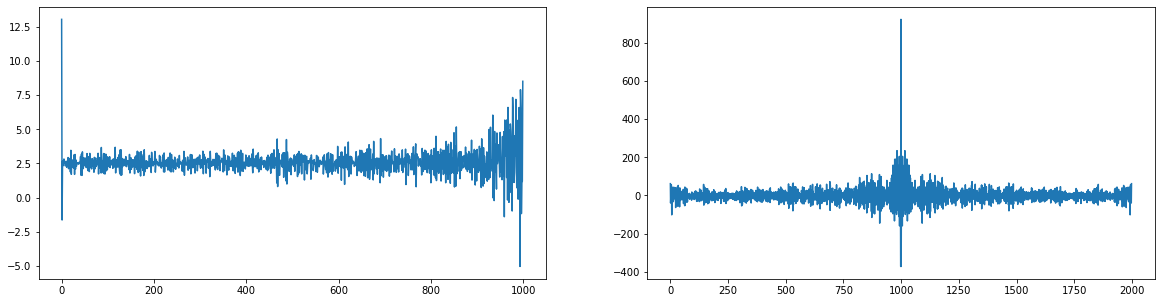

In [9]:
N = 1000

# keep in mind this is for Python where we have 0-indexed...

# calculate our X from the first exercise
meanU = 3
varU = 9
U = np.random.normal(meanU, math.sqrt(varU), N)
UShifted = np.roll(U,-1)
X = U - (1/2)*UShifted

Rx = np.empty(N)
for k in range(N):
    sum = 0
    for n in range(N-k):
        sum += X[n]*X[n+k]
    Rx[k] = sum/(N-abs(k))
    
xcorr = lambda y: np.correlate(y, y, mode="full")

fig, ax = plt.subplots(ncols=2, figsize=(20,5))
ax[0].plot(Rx)
ax[1].plot(xcorr(Rx-Rx.mean()))
display(Rx[0])
display(Rx[1])

# 6.4)
A random process defined as

$$
X(n) = aX(n-1) + U(n), \; \; \infty < n < \infty
$$

with $|a| < 1$ and $U(n) \overset{i.i.d.}{\sim} N(0, 1)$ is called an autoregressive (AR) process of order 1.
The name autoregressive is due to the regression of $X(n)$ onto $X(n-1)$.
AR processes are WSS processes, as you will show next.

## a)
Compute the mean function of the process (1).

HINT(1): For this, it may be useful to express the process as $X(n) = \sum_{m=0}^{\infty} a^m U(n-m)$.

## b)
Compute the ACF of the process (2) and plot it for different values of a.
How do you expect the realizations of the process to look like, depending on the value chosen for a?

HINT(2): You may find the following result useful: $\sum_{m=0}^{\infty} cr^m = \frac{c}{1-r}$, for $|r| < 1$

First lets calculate the mean (they are iid, so n-m could just be 0, and should be the same):

$$
E[X(n)] 
= E\left[ \sum_{m=0}^{\infty} a^m U(n-m) \right]
= E\left[\frac{1}{1-a} U(0) \right]
= E\left[\frac{1}{1-a} \right] E[U(0)]
= E\left[\frac{1}{1-a} \right] E[U(0)]
= E\left[\frac{1}{1-a} \right] \cdot 0
= 0
$$

Computing the ACF

$$
\begin{align}
E[X(n)X(n+k)] &= \\
&= E\left[ (aX(n-1) + U(n))(aX(n+k-1) + U(n+k)) \right] \\
&= E\left[ (\sum_{m=0}^{\infty} a^m U(n-m))(\sum_{m=0}^{\infty} a^m U(n+k-m)) \right] \\
&\text{for $k=0$} \\
&= E\left[ (\sum_{m=0}^{\infty} a^m U(n-m))(\sum_{m=0}^{\infty} a^m U(n-m)) \right] \\
&= E\left[ (\sum_{m=0}^{\infty} a^m U(n-m))^2 \right] \\
&= Var(X(n)) + E[X(n)]^2 \\
&= Var(\frac{1}{1-a} U(0)) \\
&= \left( \frac{1}{1-a} \right)^2 Var(U(0)) \\
&= \frac{1^2}{(1-a)^2} \cdot 1 \\
&= \frac{1}{(1-a)^2} \\
&\text{for $k \neq 0$} \\
&= E\left[ \sum_{m=0}^{\infty} a^m U(n-m) \right] E\left[\sum_{m=0}^{\infty} a^m U(n+k-m) \right] \\
&= E\left[ \sum_{m=0}^{\infty} a^m U(n-m) \right]^2 \\
&= 0 \\
\end{align}
$$

Keep in mind, if we write the process as a sum, then each sample in our sum is IID, as U is IID, unless it is compared with itself.

Computed the ACF, and we thereby also proved that it was a WSS process.

'X(n) - mean -0.07078570211907749 - var 6.049053700330289'

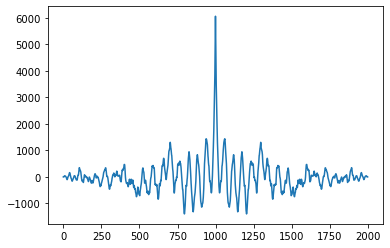

In [43]:
N = 1000

a = 0.9

meanU = 0
varU = 1
U = np.random.normal(meanU, math.sqrt(varU), N)

X = np.zeros(N)

for n in range(N):
    X[n] = a*X[n-1]+U[n]
fig, ax = plt.subplots()
#ax.plot(X)
ax.plot(xcorr(X))

display("X(n) - mean {} - var {}".format(X.mean(), X.var()))